# Problem Statement
"Trips & Travel.Com" company wants to enable and establish a viable business model to expand the customer base. One of the ways to expand the customer base is to introduce a new offering of packages. Currently, there are 5 types of packages the company is offering - Basic, Standard, Deluxe, Super Deluxe, King. Looking at the data of the last year, we observed that 18% of the customers purchased the packages. However, the marketing cost was quite high because customers were contacted at random without looking at the available information. The company is now planning to launch a new product i.e. Wellness Tourism Package. Wellness Tourism is defined as Travel that allows the traveler to maintain, enhance or kick-start a healthy lifestyle, and support or increase one's sense of well-being. However, this time company wants to harness the available data of existing and potential customers to make the marketing expenditure more efficient.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df=pd.read_csv('Travel.csv')

In [3]:
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

In [5]:
df.isnull().sum()

CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

In [6]:
df['Gender'].value_counts()

Gender
Male       2916
Female     1817
Fe Male     155
Name: count, dtype: int64

In [7]:
df['MaritalStatus'].value_counts()

MaritalStatus
Married      2340
Divorced      950
Single        916
Unmarried     682
Name: count, dtype: int64

In [8]:
df['Gender']=df['Gender'].replace('Fe Male', 'Female')
df['MaritalStatus']=df['MaritalStatus'].replace('Single','Unmarried')

In [9]:
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Unmarried,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [10]:
df['Gender'].value_counts()

Gender
Male      2916
Female    1972
Name: count, dtype: int64

In [11]:
df['MaritalStatus'].value_counts()

MaritalStatus
Married      2340
Unmarried    1598
Divorced      950
Name: count, dtype: int64

In [12]:
import numpy as np

features_with_na = [feature for feature in df.columns if df[feature].isnull().sum() >= 1]
for feature in features_with_na:
    print(feature, np.round(df[feature].isnull().mean() * 100, 5), '% missing values')


Age 4.62357 % missing values
TypeofContact 0.51146 % missing values
DurationOfPitch 5.13502 % missing values
NumberOfFollowups 0.92062 % missing values
PreferredPropertyStar 0.53191 % missing values
NumberOfTrips 2.86416 % missing values
NumberOfChildrenVisiting 1.35025 % missing values
MonthlyIncome 4.76678 % missing values


In [13]:
df[features_with_na].select_dtypes(exclude='object').describe()

,Age,DurationOfPitch,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,NumberOfChildrenVisiting,MonthlyIncome
count,4662.000000,4637.000000,4843.000000,4862.000000,4748.000000,4822.000000,4655.000000
mean,37.622265,15.490835,3.708445,3.581037,3.236521,1.187267,23619.853491
std,9.316387,8.519643,1.002509,0.798009,1.849019,0.857861,5380.698361
min,18.000000,5.000000,1.000000,3.000000,1.000000,0.000000,1000.000000
25%,31.000000,9.000000,3.000000,3.000000,2.000000,1.000000,20346.000000
50%,36.000000,13.000000,4.000000,3.000000,3.000000,1.000000,22347.000000
75%,44.000000,20.000000,4.000000,4.000000,4.000000,2.000000,25571.000000
max,61.000000,127.000000,6.000000,5.000000,22.000000,3.000000,98678.000000


In [14]:
#Age
df.Age.fillna(df.Age.median(),inplace=True)
#Type of contract
df.TypeofContact.fillna(df.TypeofContact.mode()[0],inplace=True)

#DurationOfPitch
df.DurationOfPitch.fillna(df.DurationOfPitch.median(),inplace=True)

#NumberOfFollowups
df.NumberOfFollowups.fillna(df.NumberOfFollowups.median(),inplace=True)

#PreferredPropertySar
df.PreferredPropertyStar.fillna(df.PreferredPropertyStar.mode()[0],inplace=True)

#NumberOfTrips
df.NumberOfTrips.fillna(df.NumberOfTrips.median(),inplace=True)

#NumberOfChildrenVisiting
df.NumberOfChildrenVisiting.fillna(df.NumberOfChildrenVisiting.mode()[0],inplace=True)

#MonthlyIncome
df.MonthlyIncome.fillna(df.MonthlyIncome.median,inplace=True)

In [15]:
df.head()
df.isnull().sum()

CustomerID                  0
ProdTaken                   0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
dtype: int64

In [16]:
df.head()


,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Unmarried,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,36.0,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [17]:
df.drop('CustomerID',inplace=True,axis=1)

## Feature Engineering

In [18]:
df['TotalVisiting'] = df['NumberOfChildrenVisiting'] + df['NumberOfPersonVisiting']
df.drop(columns=['NumberOfChildrenVisiting','NumberOfPersonVisiting'],axis=1,inplace=True)

In [19]:
df.head()

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,Designation,MonthlyIncome,TotalVisiting
0,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,Manager,20993.0,3.0
1,0,49.0,Company Invited,1,14.0,Salaried,Male,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,Manager,20130.0,5.0
2,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,4.0,Basic,3.0,Unmarried,7.0,1,3,0,Executive,17090.0,3.0
3,0,33.0,Company Invited,1,9.0,Salaried,Female,3.0,Basic,3.0,Divorced,2.0,1,5,1,Executive,17909.0,3.0
4,0,36.0,Self Enquiry,1,8.0,Small Business,Male,3.0,Basic,4.0,Divorced,1.0,0,5,1,Executive,18468.0,2.0


In [20]:
#categorical features
num_features = [feature for feature in df.columns if df[feature].dtype=='O']
print('Num of Categorical Features:', len(num_features))

Num of Categorical Features: 7


In [21]:
#Descrete features
discrete_features=[feature for feature in num_features if len(df[feature].unique())<=25]
print('No of Discrete features :', len(discrete_features))

No of Discrete features : 6


In [22]:
continuous_features=[feature for feature in num_features if feature not in discrete_features]
print('No of Continuous features :',len(continuous_features))

No of Continuous features : 1


In [23]:
df.head()

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,Designation,MonthlyIncome,TotalVisiting
0,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,Manager,20993.0,3.0
1,0,49.0,Company Invited,1,14.0,Salaried,Male,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,Manager,20130.0,5.0
2,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,4.0,Basic,3.0,Unmarried,7.0,1,3,0,Executive,17090.0,3.0
3,0,33.0,Company Invited,1,9.0,Salaried,Female,3.0,Basic,3.0,Divorced,2.0,1,5,1,Executive,17909.0,3.0
4,0,36.0,Self Enquiry,1,8.0,Small Business,Male,3.0,Basic,4.0,Divorced,1.0,0,5,1,Executive,18468.0,2.0


## Train Test Split

In [24]:
from sklearn.model_selection import train_test_split
X=df.drop(['ProdTaken'],axis=1)
y=df['ProdTaken']

In [25]:
# Step 1: Convert MonthlyIncome to numeric, coercing errors to NaN
X['MonthlyIncome'] = pd.to_numeric(X['MonthlyIncome'], errors='coerce')

# Step 2: Fill NaN values with the median of the column
median_income = X['MonthlyIncome'].median()
X['MonthlyIncome'].fillna(median_income, inplace=True)

# Step 3: Ensure the column is of numeric type
X['MonthlyIncome'] = X['MonthlyIncome'].astype(float)

# Check dtypes
print(X.dtypes)


Age                       float64
TypeofContact              object
CityTier                    int64
DurationOfPitch           float64
Occupation                 object
Gender                     object
NumberOfFollowups         float64
ProductPitched             object
PreferredPropertyStar     float64
MaritalStatus              object
NumberOfTrips             float64
Passport                    int64
PitchSatisfactionScore      int64
OwnCar                      int64
Designation                object
MonthlyIncome             float64
TotalVisiting             float64
dtype: object


In [26]:
X.head()

,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,Designation,MonthlyIncome,TotalVisiting
0,41.0,Self Enquiry,3,6.0,Salaried,Female,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,Manager,20993.0,3.0
1,49.0,Company Invited,1,14.0,Salaried,Male,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,Manager,20130.0,5.0
2,37.0,Self Enquiry,1,8.0,Free Lancer,Male,4.0,Basic,3.0,Unmarried,7.0,1,3,0,Executive,17090.0,3.0
3,33.0,Company Invited,1,9.0,Salaried,Female,3.0,Basic,3.0,Divorced,2.0,1,5,1,Executive,17909.0,3.0
4,36.0,Self Enquiry,1,8.0,Small Business,Male,3.0,Basic,4.0,Divorced,1.0,0,5,1,Executive,18468.0,2.0


In [27]:
y.value_counts()

ProdTaken
0    3968
1     920
Name: count, dtype: int64

In [28]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((3910, 17), (978, 17))

In [29]:
# Convert Index to list
cat_features = list(X.select_dtypes(include='object').columns)
num_features = list(X.select_dtypes(exclude='object').columns)

if 'MonthlyIncome' in cat_features:
    cat_features.remove('MonthlyIncome')
if 'MonthlyIncome' not in num_features:
    num_features.append('MonthlyIncome')


print("Categorical features:", cat_features)
print("Numerical features:", num_features)


Categorical features: ['TypeofContact', 'Occupation', 'Gender', 'ProductPitched', 'MaritalStatus', 'Designation']
Numerical features: ['Age', 'CityTier', 'DurationOfPitch', 'NumberOfFollowups', 'PreferredPropertyStar', 'NumberOfTrips', 'Passport', 'PitchSatisfactionScore', 'OwnCar', 'MonthlyIncome', 'TotalVisiting']


In [30]:
X.dtypes

Age                       float64
TypeofContact              object
CityTier                    int64
DurationOfPitch           float64
Occupation                 object
Gender                     object
NumberOfFollowups         float64
ProductPitched             object
PreferredPropertyStar     float64
MaritalStatus              object
NumberOfTrips             float64
Passport                    int64
PitchSatisfactionScore      int64
OwnCar                      int64
Designation                object
MonthlyIncome             float64
TotalVisiting             float64
dtype: object

In [31]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numerical_transformer = StandardScaler()
oh_transformer = OneHotEncoder(drop='first')
# We're combining both Onehot and Scaler so we use ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', oh_transformer, cat_features),
        ('scaler', numerical_transformer, num_features)
    ]
)

In [32]:
X_train=preprocessor.fit_transform(X_train)

In [33]:
X_train

array([[ 1.        ,  0.        ,  0.        , ...,  0.78296635,
        -0.38224537, -0.77415132],
       [ 1.        ,  0.        ,  1.        , ...,  0.78296635,
        -0.4597992 ,  0.64361526],
       [ 1.        ,  1.        ,  0.        , ...,  0.78296635,
        -0.24519557, -0.06526803],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.78296635,
        -0.36057591,  0.64361526],
       [ 1.        ,  0.        ,  0.        , ...,  0.78296635,
        -0.25279888,  0.64361526],
       [ 0.        ,  0.        ,  1.        , ..., -1.2771941 ,
        -1.08251091, -1.48303461]])

In [34]:
pd.DataFrame(X_train)

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,-0.721400,-1.020350,1.284279,-0.725271,-0.127737,-0.632399,0.679690,0.782966,-0.382245,-0.774151
1,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,-0.721400,0.690023,0.282777,-0.725271,1.511598,-0.632399,0.679690,0.782966,-0.459799,0.643615
2,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.721400,-1.020350,0.282777,1.771041,0.418708,-0.632399,0.679690,0.782966,-0.245196,-0.065268
3,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,...,-0.721400,-1.020350,1.284279,-0.725271,-0.127737,-0.632399,1.408395,-1.277194,0.213475,-0.065268
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.721400,2.400396,-1.720227,-0.725271,1.511598,-0.632399,-0.049015,-1.277194,-0.024889,2.061382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3905,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,-0.721400,-0.653841,1.284279,-0.725271,-0.674182,-0.632399,-1.506426,0.782966,-0.536973,0.643615
3906,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.455047,-0.898180,-0.718725,1.771041,-1.220627,-0.632399,1.408395,0.782966,1.529609,-0.065268
3907,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.455047,1.545210,0.282777,-0.725271,2.058043,-0.632399,-0.777720,0.782966,-0.360576,0.643615
3908,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.455047,1.789549,1.284279,-0.725271,-0.127737,-0.632399,-1.506426,0.782966,-0.252799,0.643615


In [35]:
X_test=preprocessor.transform(X_test)

In [36]:
!pip install xgboost

   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.1/124.9 MB 344.8 kB/s eta 0:06:02
   ---------------------------------------- 0.1/124.9 MB 344.8 kB/s eta 0:06:02
   ---------------------------------------- 0.1/124.9 MB 344.8 kB/s eta 0:06:02
   ---------------------------------------- 0.1/124.9 MB 240.7 kB/s eta 0:08:39
   ---------------------------------------- 0.2/124.9 MB 465.5 kB/s eta 0:04:28
   ---------------------------------------- 0.2/124.9 MB 465.5 kB/s eta 0:04:28
   --------------------

In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, roc_auc_score

In [38]:
models = {
    "Logistic Regression":LogisticRegression(),
    "Decision Tree":DecisionTreeClassifier(),
    "GradientBoosting Classifier":GradientBoostingClassifier(),
    "AdaBoost Classifier":AdaBoostClassifier(),
    "Random Forest":RandomForestClassifier(),
    "XgBoost":XGBClassifier()
}
for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(X_train,y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    model_train_accuracy = accuracy_score(y_train,y_train_pred)
    model_train_f1 = f1_score(y_train,y_train_pred)
    model_train_precision = precision_score(y_train,y_train_pred)
    model_train_recall =recall_score(y_train,y_train_pred)
    model_train_rocauc_score = roc_auc_score(y_train,y_train_pred)

    model_test_accuracy = accuracy_score(y_test,y_test_pred)
    model_test_f1 = f1_score(y_test,y_test_pred)
    model_test_precision = precision_score(y_test,y_test_pred)
    model_test_recall =recall_score(y_test,y_test_pred)
    model_test_rocauc_score = roc_auc_score(y_test,y_test_pred)

    print(list(models.keys())[i])

    print('Model performance for Training set')
    print('- Accuracy: {:.4f}'.format(model_train_accuracy))
    print('- F1 score: {:.4f}'.format(model_train_f1))
    print('- Precision: {:.4f}'.format(model_train_precision))
    print('- Recall: {:.4f}'.format(model_train_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))

    print('--------------------------------------------------')
    print('Model Performance for Test set')
    print('Model performance for Training set')
    print('- Accuracy: {:.4f}'.format(model_test_accuracy))
    print('- F1 score: {:.4f}'.format(model_test_f1))
    print('- Precision: {:.4f}'.format(model_test_precision))
    print('- Recall: {:.4f}'.format(model_test_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))

    print('='*35)
    print('\n')

Logistic Regression
Model performance for Training set
- Accuracy: 0.8460
- F1 score: 0.4234
- Precision: 0.7016
- Recall: 0.3032
- Roc Auc Score: 0.6368
--------------------------------------------------
Model Performance for Test set
Model performance for Training set
- Accuracy: 0.8364
- F1 score: 0.4118
- Precision: 0.6914
- Recall: 0.2932
- Roc Auc Score: 0.6307


Decision Tree
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
--------------------------------------------------
Model Performance for Test set
Model performance for Training set
- Accuracy: 0.9182
- F1 score: 0.7838
- Precision: 0.8101
- Recall: 0.7592
- Roc Auc Score: 0.8580


GradientBoosting Classifier
Model performance for Training set
- Accuracy: 0.8939
- F1 score: 0.6382
- Precision: 0.8756
- Recall: 0.5021
- Roc Auc Score: 0.7429
--------------------------------------------------
Model Performance for Test set
Model performance 

In [40]:
#Hyperparemeter Tuning
rf_params = {"max_depth": [5,8,15,None,10],
            "max_features":[5,7,"auto",8],
            "min_samples_split":[2,8,15,20],
            "n_estimators":[100,200,500,1000]}
xg_params = {'learning_rate':[0.1,0.01],
                 'max_depth':[5,8,12,20,30],
                 'n_estimators':[100,200,300],
                 'colsample_bytree':[0.5,0.8,1,0.3,0.4]}

In [41]:
#Models List for Hypermater tuning
randomcv_models = [
    ("RF", RandomForestClassifier(), rf_params),
     ("XG",XGBClassifier(), xg_params)
]


In [42]:
from sklearn.model_selection import RandomizedSearchCV

model_param = {}
for name, model, params in randomcv_models:
    random = RandomizedSearchCV(estimator=model,
                               param_distributions=params,
                               n_iter=100,
                               cv=3,
                               verbose=2,
                               n_jobs=-1)
    random.fit(X_train,y_train)
    model_param[name] = random.best_params_

for model_name in model_param:
    print(f"--------------------Best Paarams for {model_name}-------------------")
    print(model_param[model_name])

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Fitting 3 folds for each of 100 candidates, totalling 300 fits
--------------------Best Paarams for RF-------------------
{'n_estimators': 500, 'min_samples_split': 2, 'max_features': 7, 'max_depth': None}
--------------------Best Paarams for XG-------------------
{'n_estimators': 300, 'max_depth': 30, 'learning_rate': 0.1, 'colsample_bytree': 0.8}


In [44]:
models = {
    "Random Forest": RandomForestClassifier(n_estimators=500, min_samples_split=2, max_features=7, max_depth=None),
    "Xgboost": XGBClassifier(n_estimators= 300, max_depth= 30, learning_rate= 0.1, colsample_bytree= 0.8)
}

for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(X_train,y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    model_train_accuracy = accuracy_score(y_train,y_train_pred)
    model_train_f1 = f1_score(y_train,y_train_pred)
    model_train_precision = precision_score(y_train,y_train_pred)
    model_train_recall =recall_score(y_train,y_train_pred)
    model_train_rocauc_score = roc_auc_score(y_train,y_train_pred)

    model_test_accuracy = accuracy_score(y_test,y_test_pred)
    model_test_f1 = f1_score(y_test,y_test_pred)
    model_test_precision = precision_score(y_test,y_test_pred)
    model_test_recall =recall_score(y_test,y_test_pred)
    model_test_rocauc_score = roc_auc_score(y_test,y_test_pred)

    print(list(models.keys())[i])

    print('Model performance for Training set')
    print('- Accuracy: {:.4f}'.format(model_train_accuracy))
    print('- F1 score: {:.4f}'.format(model_train_f1))
    print('- Precision: {:.4f}'.format(model_train_precision))
    print('- Recall: {:.4f}'.format(model_train_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))

    print('--------------------------------------------------')
    print('Model Performance for Test set')
    print('Model performance for Training set')
    print('- Accuracy: {:.4f}'.format(model_test_accuracy))
    print('- F1 score: {:.4f}'.format(model_test_f1))
    print('- Precision: {:.4f}'.format(model_test_precision))
    print('- Recall: {:.4f}'.format(model_test_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))


Random Forest
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
--------------------------------------------------
Model Performance for Test set
Model performance for Training set
- Accuracy: 0.9315
- F1 score: 0.7938
- Precision: 0.9627
- Recall: 0.6754
- Roc Auc Score: 0.8345
Xgboost
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
--------------------------------------------------
Model Performance for Test set
Model performance for Training set
- Accuracy: 0.9519
- F1 score: 0.8638
- Precision: 0.9675
- Recall: 0.7801
- Roc Auc Score: 0.8869


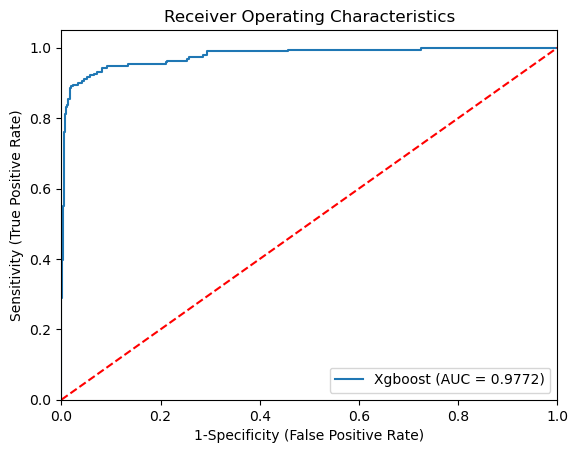

In [48]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

auc_models = [
    {
        "label": "Xgboost",
        "model": XGBClassifier(n_estimators= 300, max_depth= 30, learning_rate= 0.1, colsample_bytree= 0.8),
        "auc": 0.8869
    },
]

plt.figure()

for algo in auc_models:
    model = algo['model']
    model.fit(X_train, y_train)
    y_pred_proba = model.predict_proba(X_test)[:, 1]  # Assumes binary classification
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    auc_score = roc_auc_score(y_test, y_pred_proba)
    plt.plot(fpr, tpr, label=f"{algo['label']} (AUC = {auc_score:.4f})")

plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity (False Positive Rate)')
plt.ylabel('Sensitivity (True Positive Rate)')
plt.title('Receiver Operating Characteristics')
plt.legend(loc='lower right')
plt.savefig('auc.png')
plt.show()


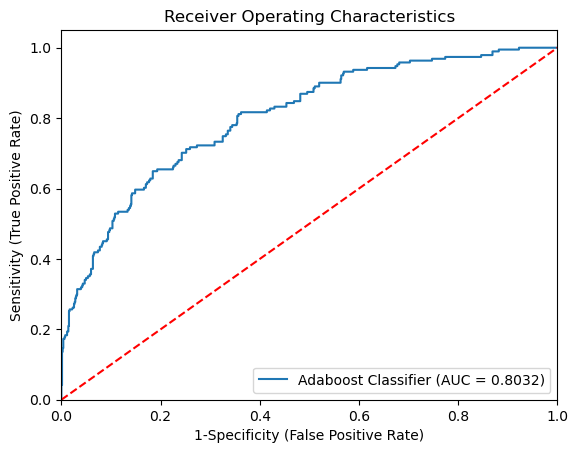

In [52]:
# import matplotlib.pyplot as plt
# from sklearn.metrics import roc_curve, roc_auc_score

# auc_models = [
#     {
#         "label": "Adaboost Classifier",
#         "model": AdaBoostClassifier(n_estimators=80, algorithm='SAMME')
#     },
# ]

# plt.figure()

# for algo in auc_models:
#     model = algo['model']
#     model.fit(X_train, y_train)
#     y_pred_proba = model.predict_proba(X_test)[:, 1]  # Assumes binary classification
#     fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
#     auc_score = roc_auc_score(y_test, y_pred_proba)
#     plt.plot(fpr, tpr, label=f"{algo['label']} (AUC = {auc_score:.4f})")

# plt.plot([0, 1], [0, 1], 'r--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('1-Specificity (False Positive Rate)')
# plt.ylabel('Sensitivity (True Positive Rate)')
# plt.title('Receiver Operating Characteristics')
# plt.legend(loc='lower right')
# plt.savefig('auc.png')
# plt.show()


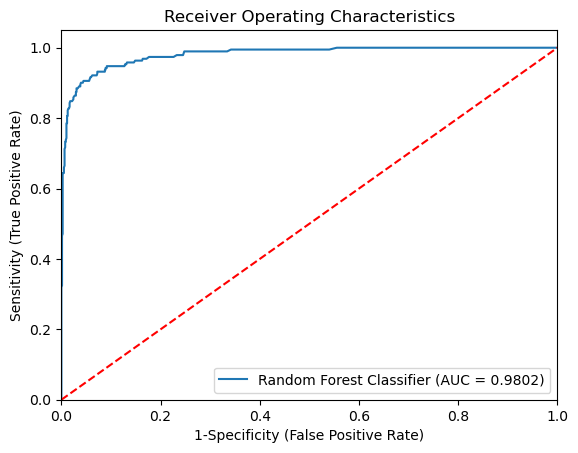

In [50]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

auc_models = [
    {
        "label": "Random Forest Classifier",
        "model": RandomForestClassifier(n_estimators=500, min_samples_split=2, max_features=7, max_depth=None)
    },
]

plt.figure()

for algo in auc_models:
    model = algo['model']
    model.fit(X_train, y_train)
    y_pred_proba = model.predict_proba(X_test)[:, 1]  # Assumes binary classification
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    auc_score = roc_auc_score(y_test, y_pred_proba)
    plt.plot(fpr, tpr, label=f"{algo['label']} (AUC = {auc_score:.4f})")

plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity (False Positive Rate)')
plt.ylabel('Sensitivity (True Positive Rate)')
plt.title('Receiver Operating Characteristics')
plt.legend(loc='lower right')
plt.savefig('auc.png')
plt.show()


In [57]:
# Example feature vector for a new customer (with 26 features)
new_customer_features = [[1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.721400, -1.020350, 1.284279, -0.725271, -0.127737, -0.632399, 0.679690, 0.782966, -0.382245, -0.774151, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6]]

# Ensure the new data has the correct number of features
print(len(new_customer_features[0]))  # Should print 26

# Predict the class label using the Random Forest model
rf_prediction = models["Random Forest"].predict(new_customer_features)
print("Random Forest Prediction:", rf_prediction)

xg_prediction = models["Xgboost"].predict(new_customer_features)
print("Xg Boost Prediction:", xg_prediction)


# Predict the probability of buying the product using the Random Forest model
rf_probabilities = models["Random Forest"].predict_proba(new_customer_features)
print("Random Forest Probabilities:", rf_probabilities)


26
Random Forest Prediction: [0]
Xg Boost Prediction: [0]
Random Forest Probabilities: [[0.862 0.138]]


In [54]:
print(X_train.shape[1])  # This should give you the number of features the model expects

26


In [58]:
import pickle
with open('Customer Purchase Prediction', 'wb') as file:
    pickle.dump(model, file)